In [50]:
#Install the tushare library
pip install tushare


In [0]:
#Import the required libraries
#The tushare library is used to import the data
import tushare as ts
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt

In [0]:
#Define the parametric variables
#Look back means the number of days we look behind to predict future data
#Forward days is the number of days we predict ahead
#Num periods is the number of periods of forward days
look_back = 40
forward_days = 2
num_periods = 20

In [53]:
#Import the tushare data of Shanghai Stock Exchange for code 000004
df=ts.get_hist_data('000004') # Get daily data
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-07-10,20.00,20.28,19.81,19.50,6367.10,-0.33,-1.64,20.312,21.007,21.550,9245.72,11166.10,11652.07
2019-07-09,20.39,20.39,20.14,19.97,5846.01,-0.16,-0.79,20.594,21.240,21.651,9890.08,11354.49,11709.16
2019-07-08,20.99,21.00,20.30,20.06,7062.51,-0.51,-2.45,20.950,21.476,21.720,10283.28,12519.18,11656.39
2019-07-05,20.70,20.98,20.81,20.45,10316.50,0.31,1.51,21.300,21.732,21.765,11618.59,15664.15,11567.97
2019-07-04,21.22,21.46,20.50,20.35,16636.50,-0.72,-3.39,21.382,21.861,21.760,14671.09,15355.77,11702.56
2019-07-03,21.98,21.98,21.22,21.03,9588.88,-0.70,-3.19,21.702,21.972,21.795,13086.48,14222.69,11053.79
2019-07-02,22.03,22.16,21.92,21.78,7811.99,-0.13,-0.59,21.886,21.996,21.798,12818.90,13862.80,11073.59
2019-07-01,21.22,22.15,22.05,21.21,13739.10,0.83,3.91,22.002,21.930,21.809,14755.09,13750.17,11491.24
2019-06-28,21.89,22.18,21.22,21.10,25579.00,-0.88,-3.98,22.164,21.898,21.782,19709.70,13258.56,11225.38


In [54]:
#Recreate the dataset to only include close column
df = df['close']
df.head(n=5)


date
2019-07-10    19.81
2019-07-09    20.14
2019-07-08    20.30
2019-07-05    20.81
2019-07-04    20.50
Name: close, dtype: float64

In [55]:
len(df)

537

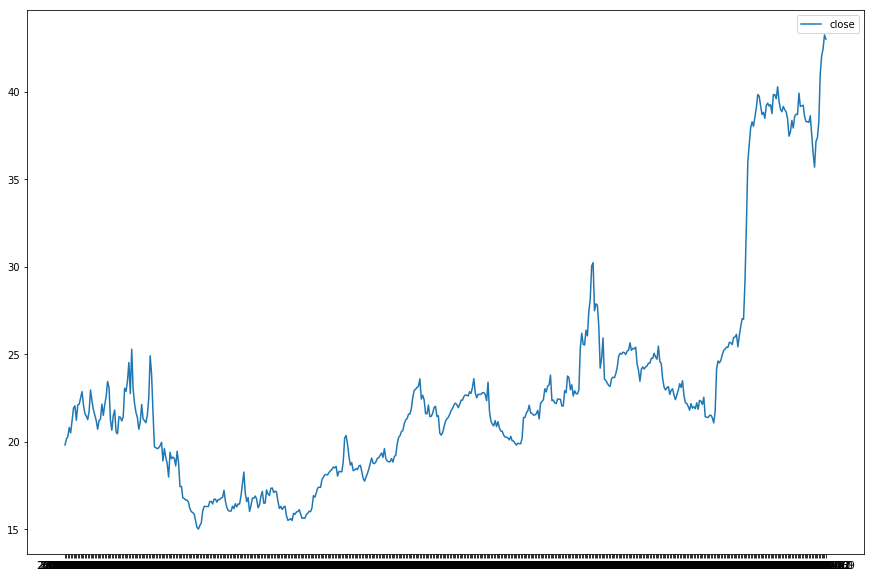

In [56]:
#Plot the dataset 
plt.figure(figsize = (15,10))
plt.plot(df, label='close')
plt.legend(loc='best')
plt.show()

In [57]:
#Reshape the array of close prices to make it a numpy array
array = df.values.reshape(df.shape[0],1)
array[:5]

array([[19.81],
       [20.14],
       [20.3 ],
       [20.81],
       [20.5 ]])

In [58]:
#Scale the data to have values from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.17026549],
       [0.1819469 ],
       [0.18761062],
       [0.20566372],
       [0.19469027]])

In [0]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [0]:
#split in Train and Test

division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [0]:
#Split train and validation data
#Also call the processdata function for train test split
X_test,y_test = processData(array_test,look_back,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])
X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
#Print the dimensions of the various sets
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(364, 40, 1)
(92, 40, 1)
(39, 40, 1)
(364, 2)
(92, 2)
(39, 2)


In [63]:
#Create the model. The model has input layer, 2 hidden LSTM layers with 10 neurons each, and output layer.
NUM_NEURONS_FirstLayer = 10
NUM_NEURONS_SecondLayer = 10
#NUM_NEURONS_ThirdLayer = 10
EPOCHS = 200

#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))

model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
#model.add(LSTM(NUM_NEURONS_ThirdLayer,input_shape=(NUM_NEURONS_SecondLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
fit_model= model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Train on 364 samples, validate on 92 samples
Epoch 1/200
 - 31s - loss: 0.0062 - acc: 0.5577 - val_loss: 0.0086 - val_acc: 0.4565
Epoch 2/200
 - 29s - loss: 0.0036 - acc: 0.5247 - val_loss: 0.0062 - val_acc: 0.4565
Epoch 3/200
 - 29s - loss: 0.0033 - acc: 0.5275 - val_loss: 0.0048 - val_acc: 0.5761
Epoch 4/200
 - 29s - loss: 0.0029 - acc: 0.5275 - val_loss: 0.0044 - val_acc: 0.4239
Epoch 5/200
 - 29s - loss: 0.0026 - acc: 0.5082 - val_loss: 0.0040 - val_acc: 0.5870
Epoch 6/200
 - 29s - loss: 0.0026 - acc: 0.4835 - val_loss: 0.0039 - val_acc: 0.4130
Epoch 7/200
 - 28s - loss: 0.0023 - acc: 0.4918 - val_loss: 0.0040 - val_acc: 0.4130
Epoch 8/200
 - 29s - loss: 0.0023 - acc: 0.5220 - val_loss: 0.0036 - val_acc: 0.5870
Epoch 9/200
 - 28s - loss: 0.0021 - acc: 0.4780 - val_loss: 0.0033 - val_acc: 0.5870
Epoch 10/200
 - 28s - loss: 0.0021 - acc: 0.5357 - val_loss: 0.0031 - val_acc: 0.4348
Epoch 11/200
 - 28s - loss: 0.0020 - acc: 0.4808 - val_loss: 0.0030 - val_acc: 0.5870
Epoch 12/200
 - 29

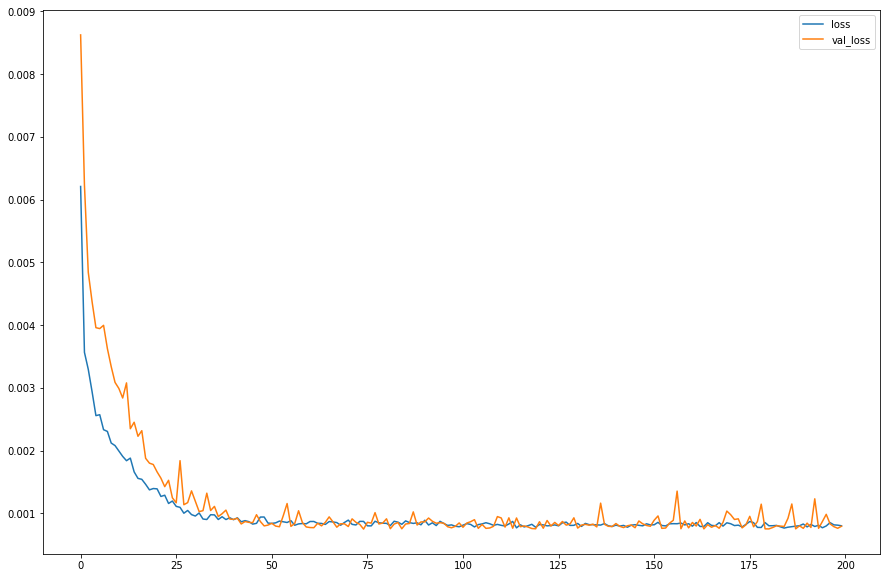

In [64]:
#Plot the validation loss and the loss function
plt.figure(figsize = (15,10))

plt.plot(fit_model.history['loss'], label='loss')
plt.plot(fit_model.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [0]:
#Predict the values for test input data
Xt = model.predict(X_test)

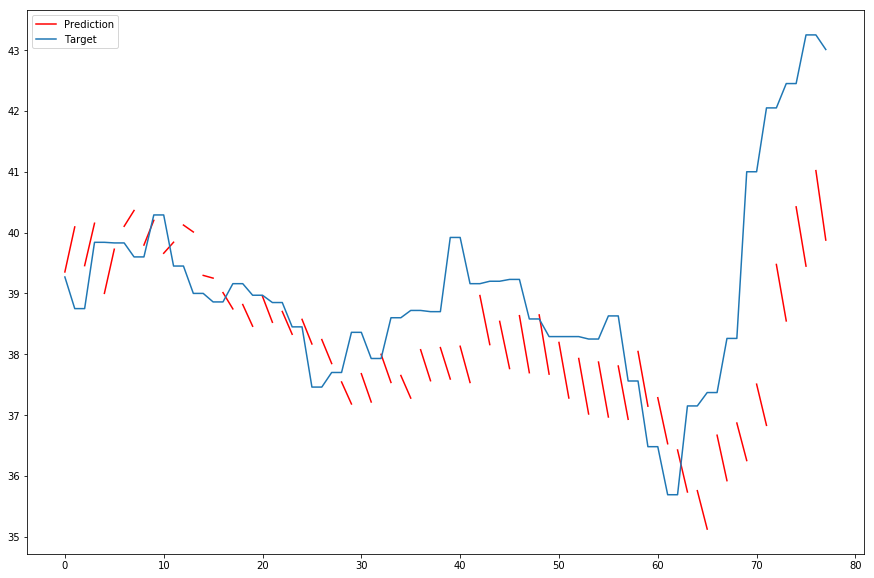

In [66]:
#Plot training prediction and actual price
plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

In [0]:

division = len(array) - num_periods*forward_days

leftover = division%forward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]

In [0]:
Xtrain,ytrain = processData(array_train,look_back,forward_days)
Xtest,ytest = processData(array_test,look_back,forward_days)

In [0]:
Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()

Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [0]:
#Form the total output data set, combining test and train
y = np.concatenate((ytrain, ytest), axis=0)

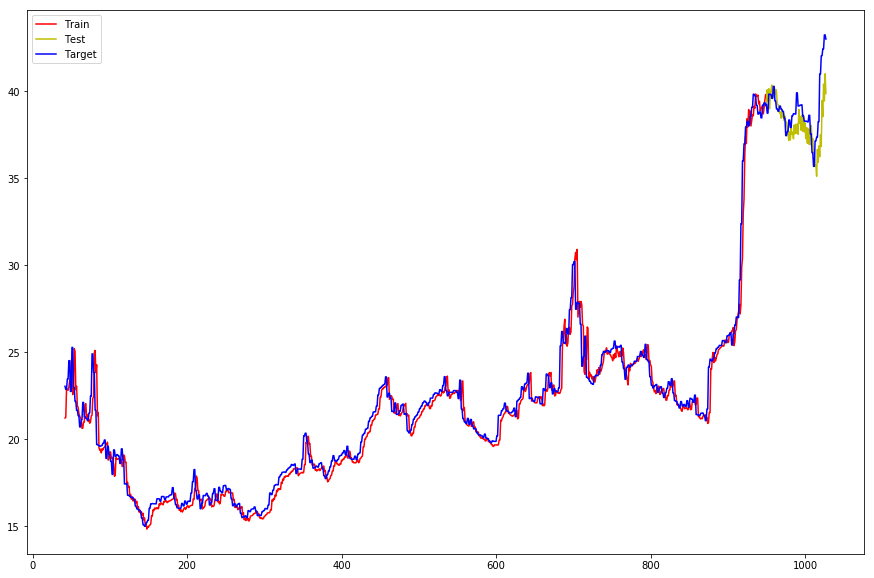

In [71]:
plt.figure(figsize = (15,10))

# Data in Train/Validation
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='r', label='Train')
# Data in Test
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='y', label='Test')

#Data used
plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='b', label='Target')

#Initial data. It should overlap the data used
plt.legend(loc='best')
plt.show()
